## Important Libraries

In [69]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

## Read Data and Show it

In [3]:
data=pd.read_csv('Houses.csv')

In [4]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
data.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
def replace_null_values(data):
    for col in data.columns:
        if data[col].dtype=='int64':
            data[col].fillna(data[col].median(),inplace=True)
        elif data[col].dtype=='float64':
            data[col].fillna(data[col].mean(),inplace=True)
        elif data[col].dtype=='object':
            data[col].fillna(data[col].mode().values[0],inplace=True)
    return data                

In [10]:
data=replace_null_values(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_5728\2480748525.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(),inplace=True)
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_5728\2480748525.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [11]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data['1stFlrSF'].unique()

array([ 856, 1262,  920,  961, 1145,  796, 1694, 1107, 1022, 1077, 1040,
       1182,  912, 1494, 1253,  854, 1004, 1296, 1114, 1339, 1158, 1108,
       1795, 1060, 1600,  900, 1704,  520,  649, 1228, 1234, 1700, 1561,
       1132, 1097, 1297, 1057, 1152, 1324, 1328,  884,  938, 1150, 1752,
       1518, 1656,  736,  955,  794,  816, 1842, 1360, 1425,  983,  860,
       1426,  780,  581, 1370,  902, 1143, 2207, 1479,  747, 1304, 2223,
        845,  885, 1086,  840,  526,  952, 1072, 1768,  682, 1337, 1563,
       1065,  804, 1301,  684,  612, 1013,  990, 1235,  964, 1260,  905,
        680, 1588,  960,  835, 1225, 1610,  977, 1535, 1226, 1053, 1047,
        789,  997, 1844, 1216,  774, 1282, 2259, 1436,  729, 1092, 1125,
       1699,  728,  988,  772, 1080, 1199, 1586,  958,  660, 1327, 1721,
       1682, 1214, 1959,  928,  864, 1734,  910, 1501, 1728,  970,  875,
        896,  969, 1710, 1252, 1200,  572,  991, 1392, 1232, 1572, 1541,
        882, 1149,  808, 1867, 1707, 1064, 1362, 16

## Data  Analysis and Visualization

In [14]:
data_objs=pd.DataFrame()
for col in data.columns:
    if data[col].dtype=='object':
        data_objs[col]=data[col]
data_objs['SalePrice']=data['SalePrice']        
data_objs.head()        

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional GarageType  \
0      CollgCr       Norm       Norm  ...          Gd        Typ     Attchd   
1      Veenker      Feedr       Norm  ...          TA        Typ     Attchd   
2      CollgCr       Norm       Norm  ...          Gd        Typ     Attchd   
3      Crawfor       Norm       Norm  ...          Gd        Typ     Detchd   
4      NoRidge       Norm       Norm  ...          Gd        Typ     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  \
0          RFn         TA         TA          Y       WD        Normal   
1          RFn         TA         TA          Y       WD        Normal   
2          RFn         TA         TA          Y       WD        Normal   
3          Unf         TA         TA          Y       WD       Abnorml   
4          RFn         TA         TA          Y       WD        Normal   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 38 columns]

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_5728\2981807476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_objs,y=col,x=data_objs['SalePrice'],orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_5728\2981807476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_objs,y=col,x=data_objs['SalePrice'],orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_5728\2981807476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_objs,y=col,x=data_objs['SalePrice'],orient='h',

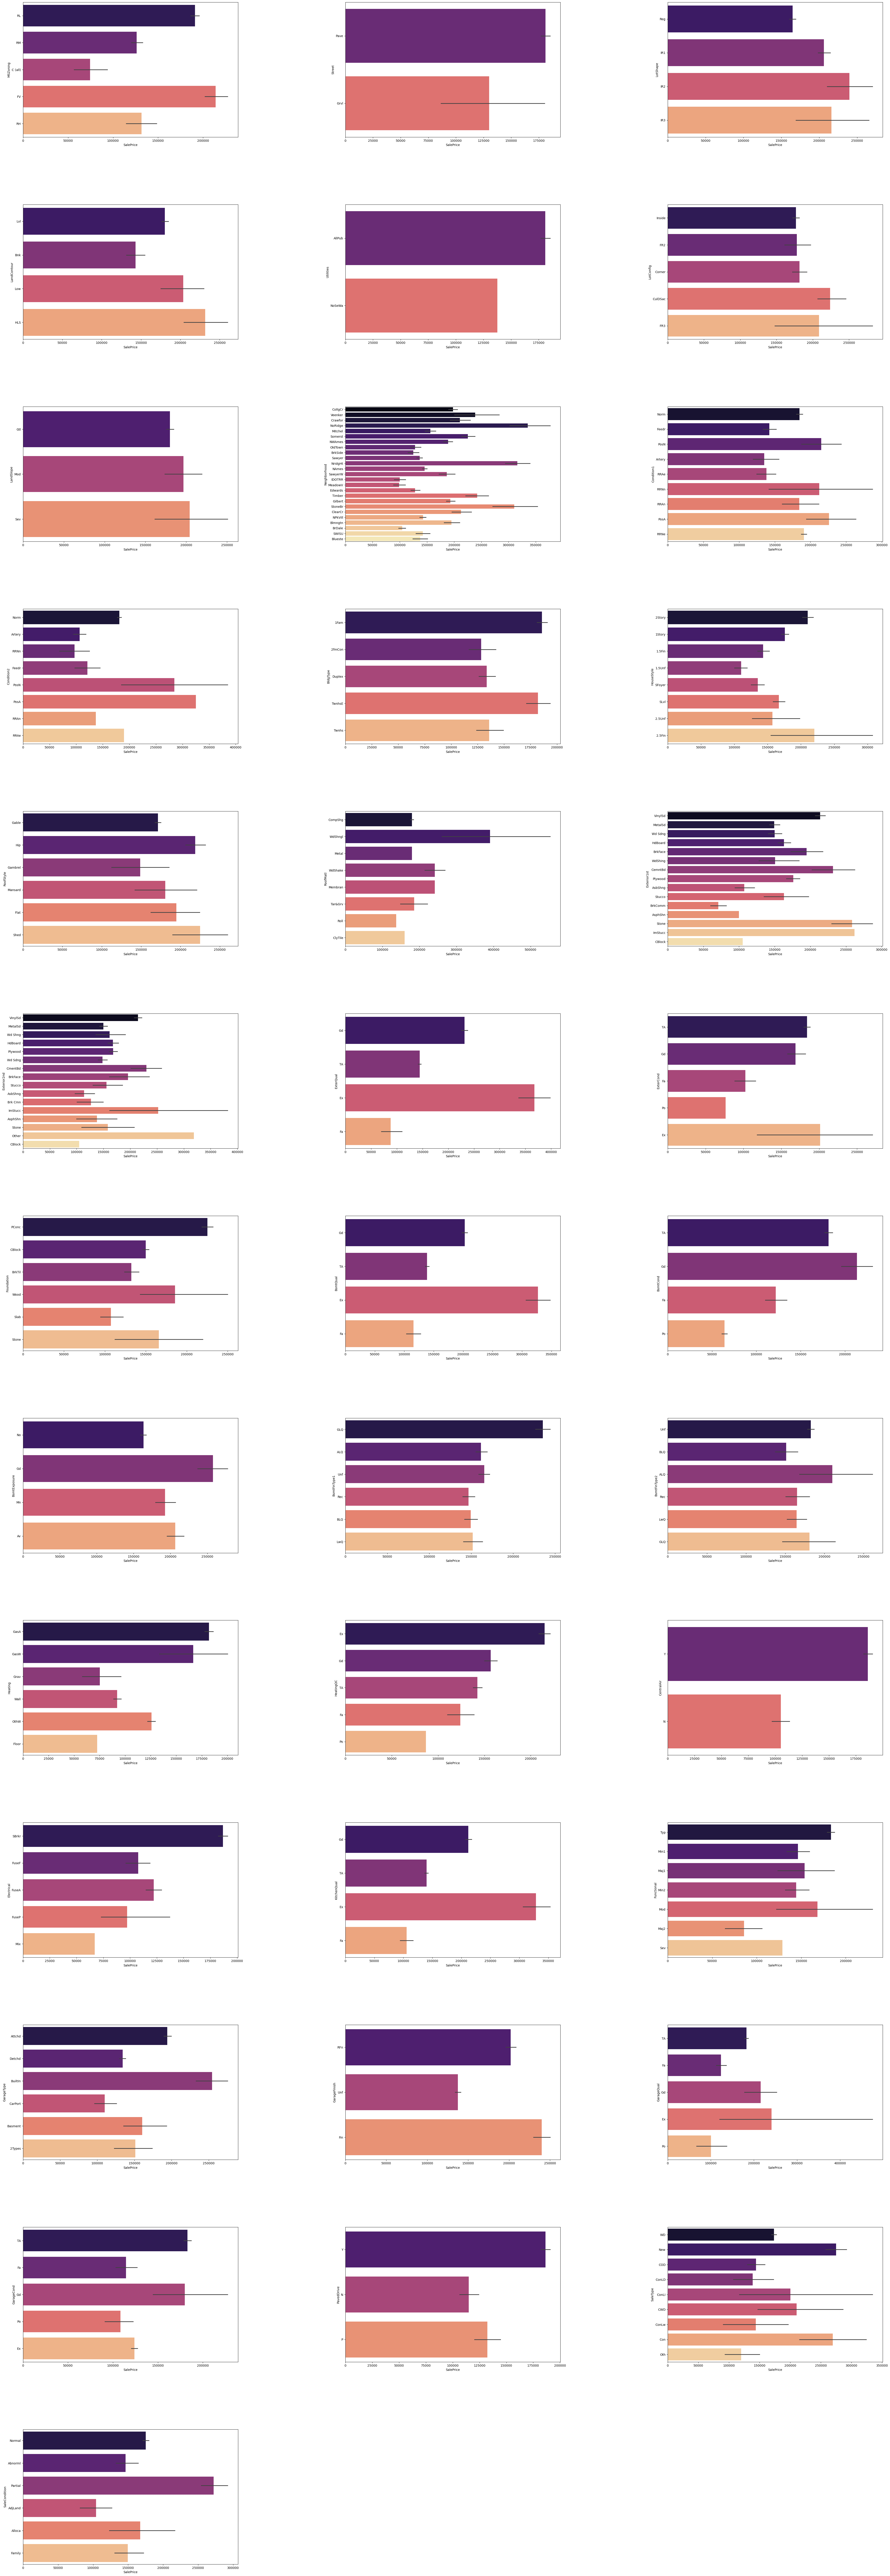

In [15]:
plt.figure(figsize=(50,150))
for col in data_objs.columns[:-1]:
    plt.subplot(13,3,(list(data_objs.columns).index(col))+1)
    sns.barplot(data=data_objs,y=col,x=data_objs['SalePrice'],orient='h',palette='magma')
plt.subplots_adjust(wspace=.5, hspace=.5)    
plt.show()    


In [16]:
data_nums=pd.DataFrame()
for col in data.columns:
    if data[col].dtype=='int64' or data[col].dtype=='float64' :
        data_nums[col]=data[col]
data_nums['SalePrice']=data['SalePrice']        
data_nums.head()     

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

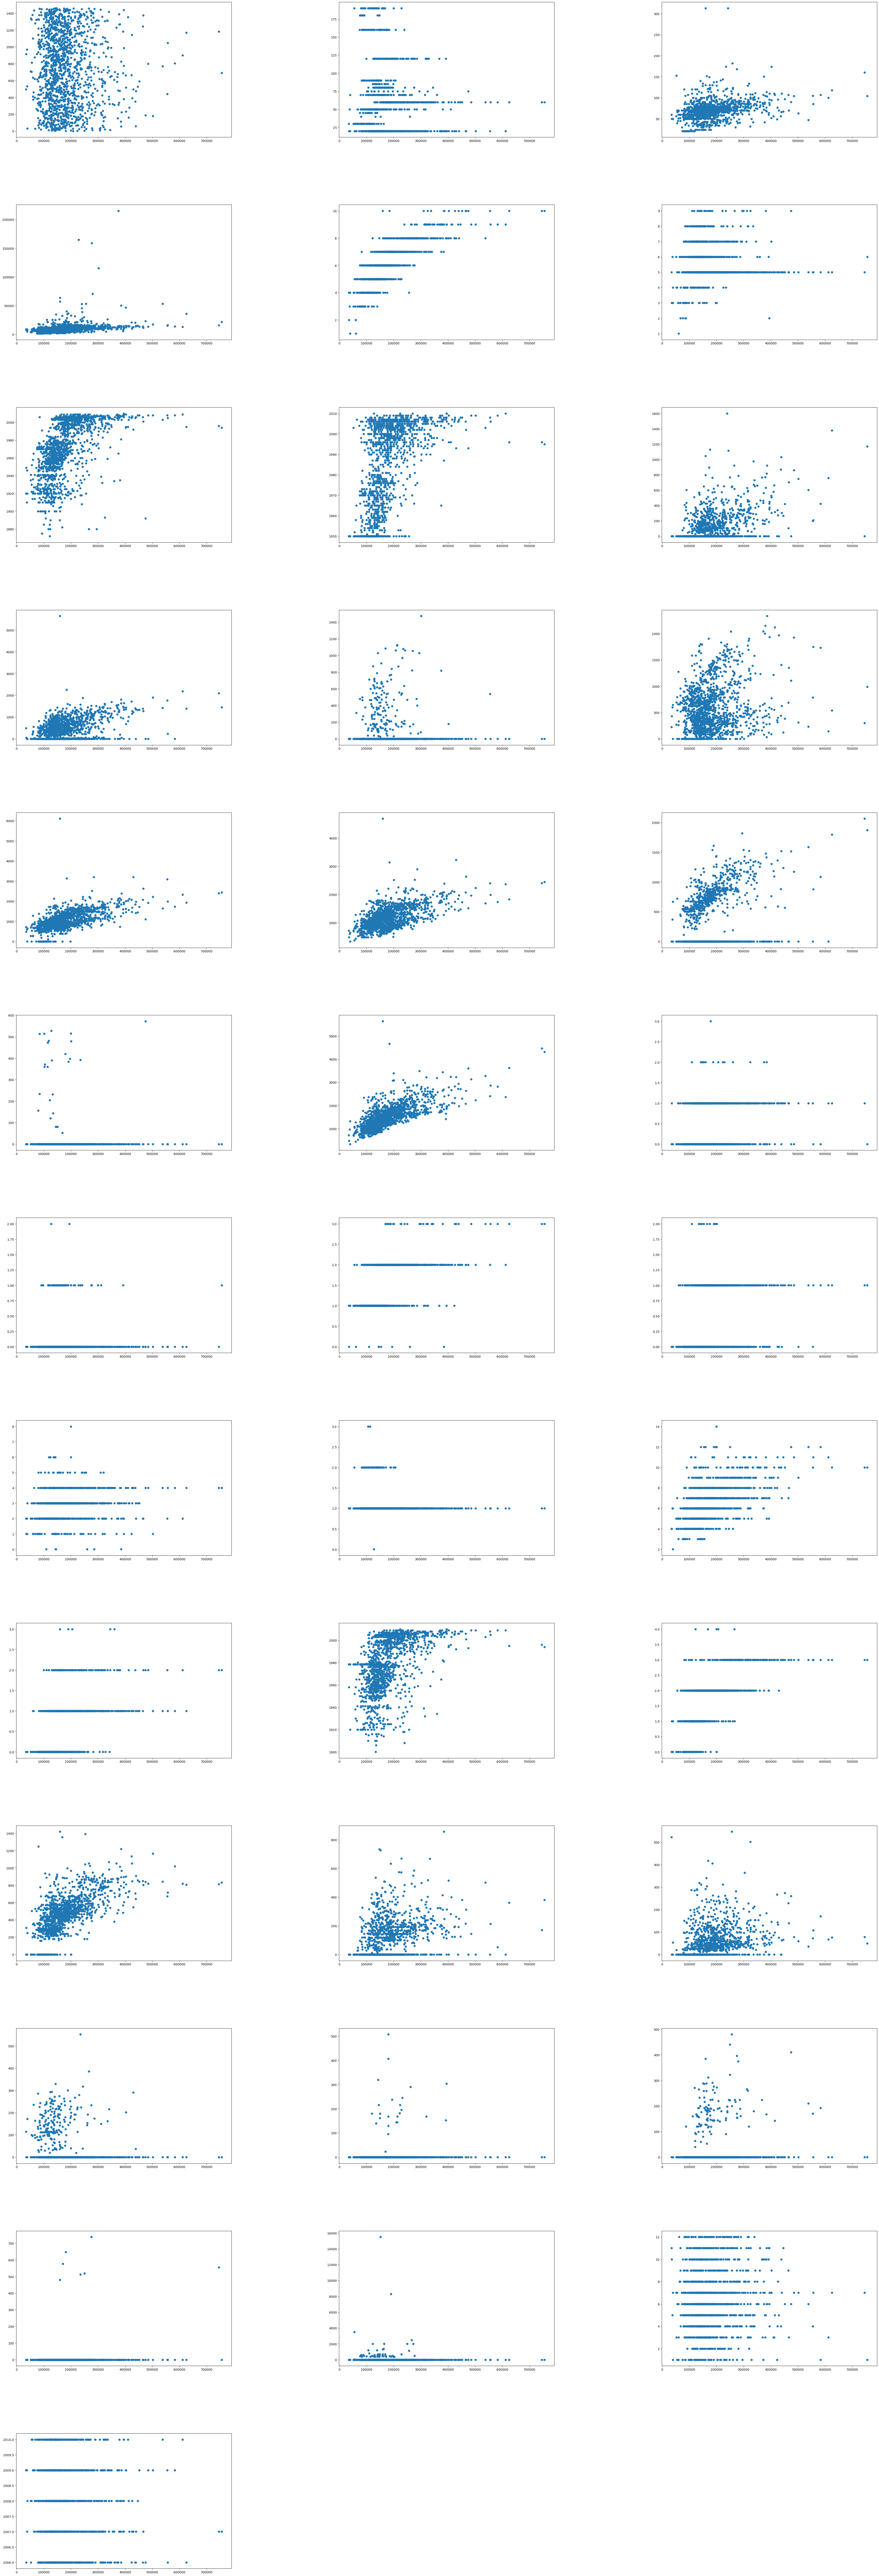

In [17]:
plt.figure(figsize=(50,150))
for col in data_nums.columns[:-1]:
    plt.subplot(13,3,(list(data_nums.columns).index(col))+1)
    plt.scatter(data=data_nums,y=col,x=data_nums['SalePrice'])
plt.subplots_adjust(wspace=.5, hspace=.5)    
plt.show()    

## Data Preprocessing

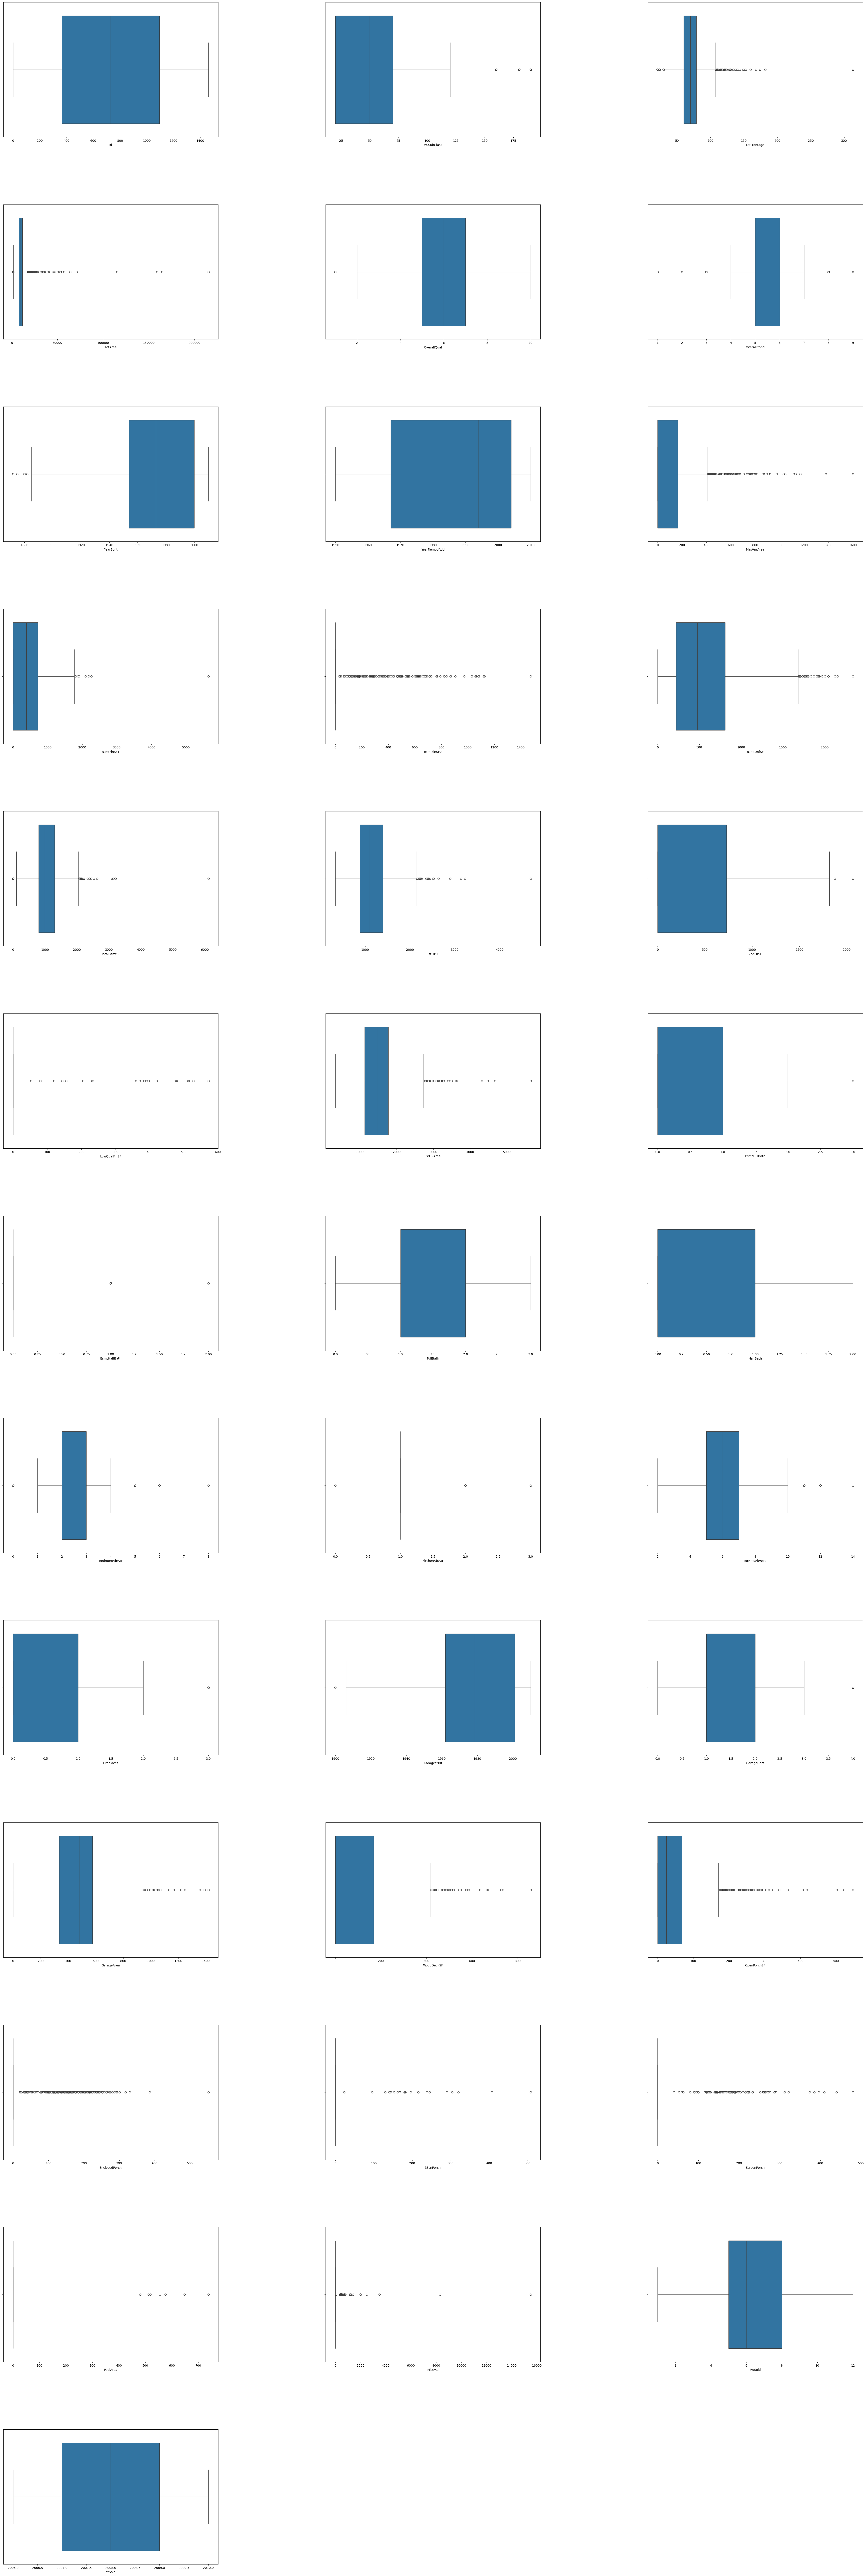

In [18]:
plt.figure(figsize=(50,150))
for col in data_nums.columns[:-1]:
    plt.subplot(13,3,(list(data_nums.columns).index(col))+1)
    sns.boxplot(data=data_nums,x=data_nums[col],orient='h')
plt.subplots_adjust(wspace=.5, hspace=.5)    
plt.show()    

In [19]:
for col in data_nums.columns[:-1]:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_fence=Q1-(IQR*1.5)
    upper_fence=Q3+(IQR*1.5) 
    lower_outliers=data[data[col]<lower_fence][col].values
    upper_outliers=data[data[col]>upper_fence][col].values
    data[col].replace(lower_outliers,lower_fence,inplace=True)
    data[col].replace(upper_outliers,upper_fence,inplace=True)  

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_5728\1776969243.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(lower_outliers,lower_fence,inplace=True)
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_5728\1776969243.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

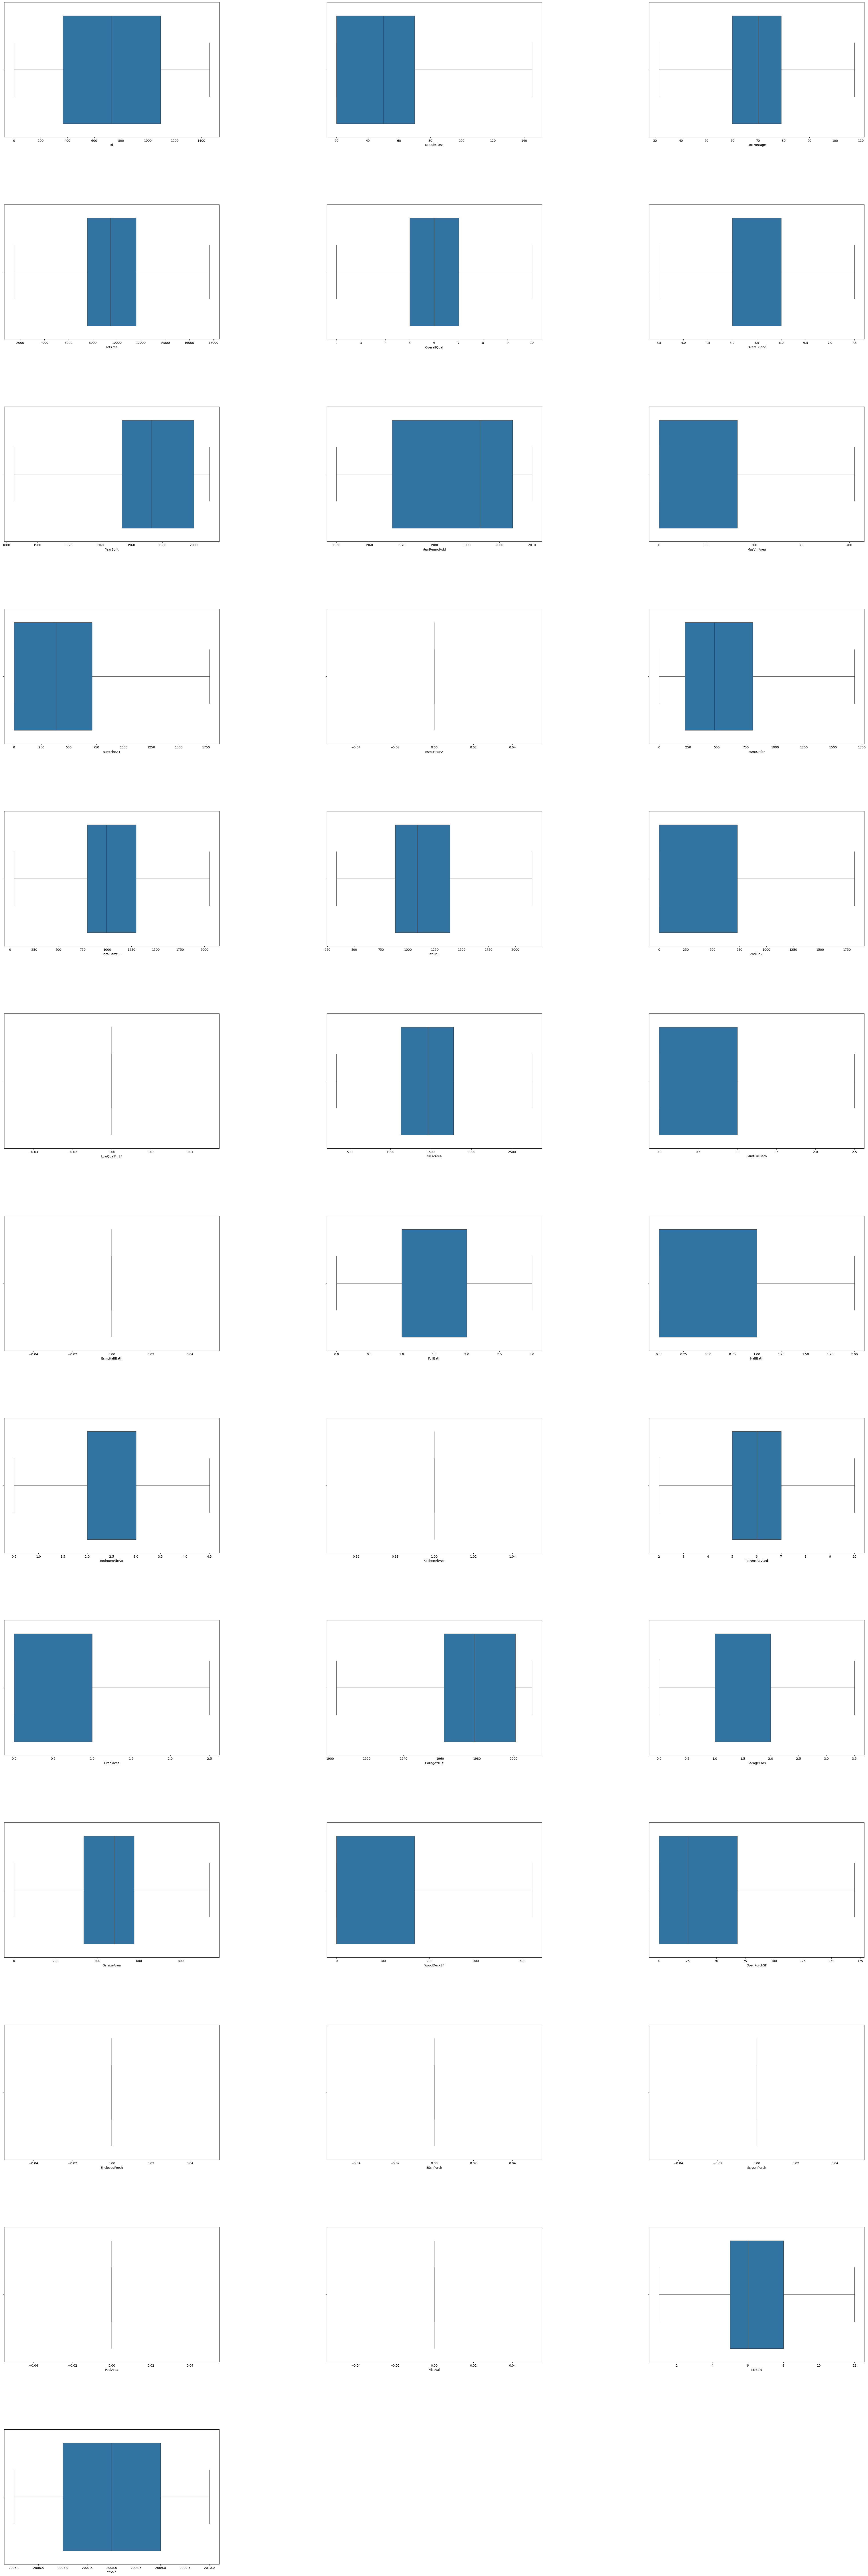

In [20]:
plt.figure(figsize=(50,150))
for col in data_nums.columns[:-1]:
    plt.subplot(13,3,(list(data_nums.columns).index(col))+1)
    sns.boxplot(data=data,x=data[col],orient='h')
plt.subplots_adjust(wspace=.5, hspace=.5)    
plt.show()    

In [21]:
def convert_obj_num(data):
    for col in data.columns:
        if data[col].dtype=='object':
            lbl=LabelEncoder()
            data[col]=lbl.fit_transform(data[col])
    return data        

In [22]:
data=convert_obj_num(data)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   float64
 18  YearBuil

<Axes: >

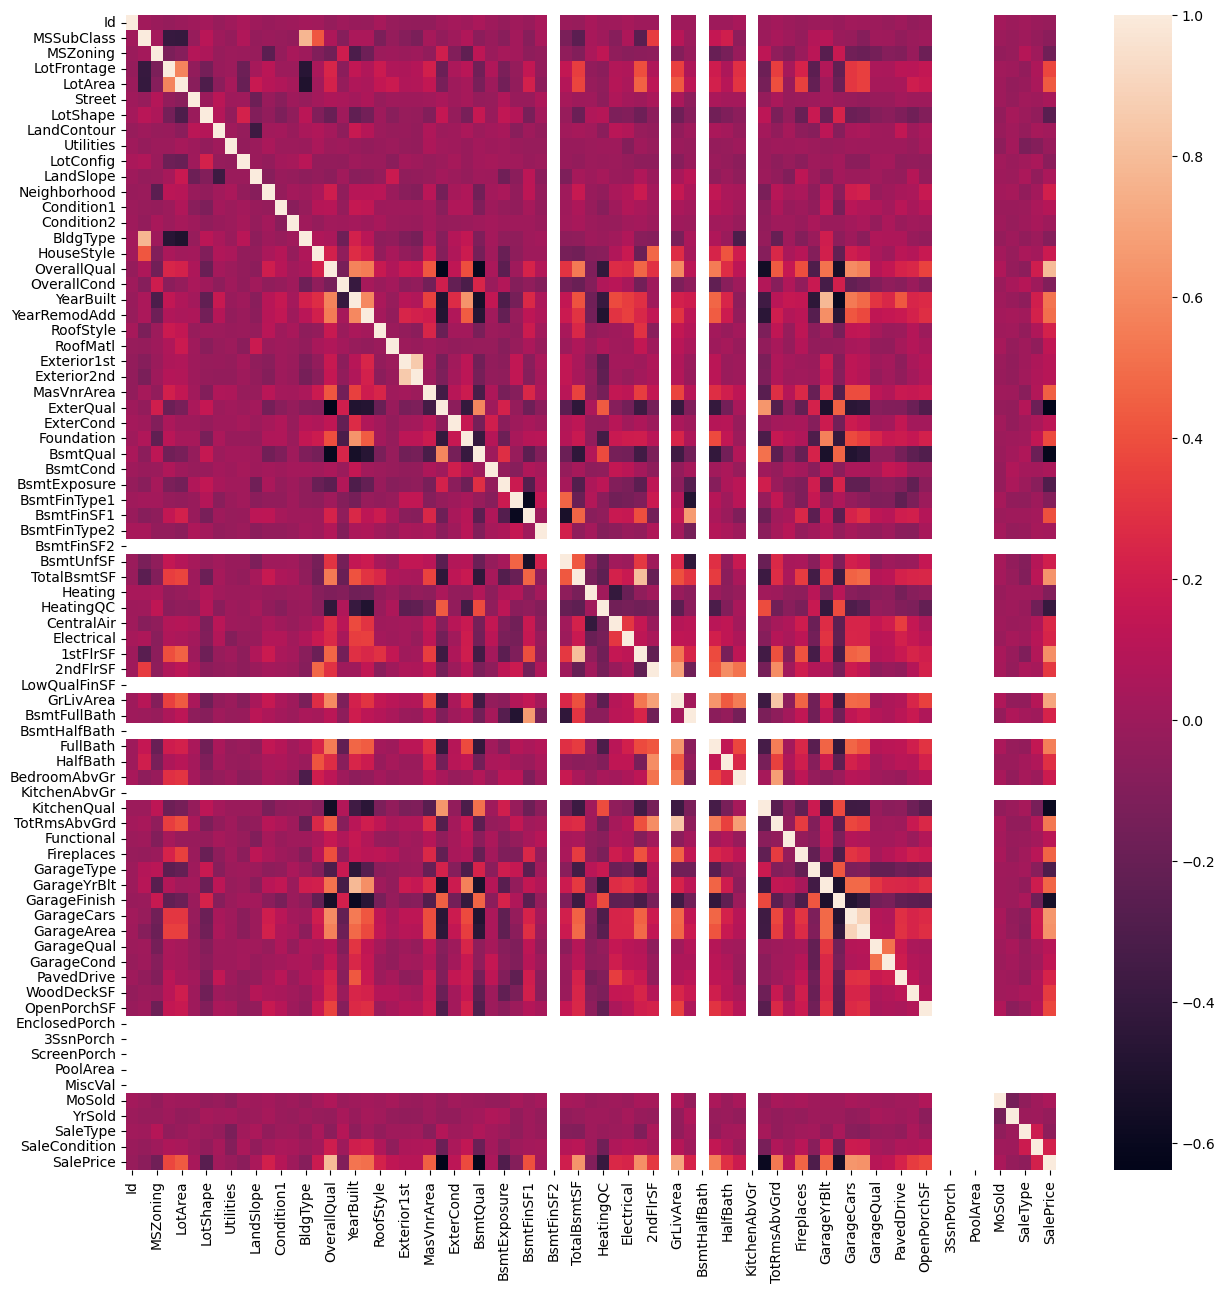

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr())

In [25]:
def drop_cols_low_corr(data):
    for col in data.columns:
        if -0.6<=data.iloc[:,-1].corr(data[col])<=0.6:
            data.drop(col,axis=1,inplace=True)
    return data        

In [26]:
data=drop_cols_low_corr(data)

c:\Users\Mahmoud\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Mahmoud\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\Mahmoud\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Mahmoud\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\Mahmoud\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Mahmoud\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\Mahmoud\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: Runt

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   ExterQual      1460 non-null   int32  
 2   BsmtQual       1460 non-null   int32  
 3   BsmtFinSF2     1460 non-null   int64  
 4   TotalBsmtSF    1460 non-null   int64  
 5   1stFlrSF       1460 non-null   float64
 6   LowQualFinSF   1460 non-null   int64  
 7   GrLivArea      1460 non-null   float64
 8   BsmtHalfBath   1460 non-null   int64  
 9   KitchenAbvGr   1460 non-null   int64  
 10  GarageCars     1460 non-null   float64
 11  GarageArea     1460 non-null   float64
 12  EnclosedPorch  1460 non-null   int64  
 13  3SsnPorch      1460 non-null   int64  
 14  ScreenPorch    1460 non-null   int64  
 15  PoolArea       1460 non-null   int64  
 16  MiscVal        1460 non-null   int64  
 17  SalePrice      1460 non-null   int64  
dtypes: float

<Axes: >

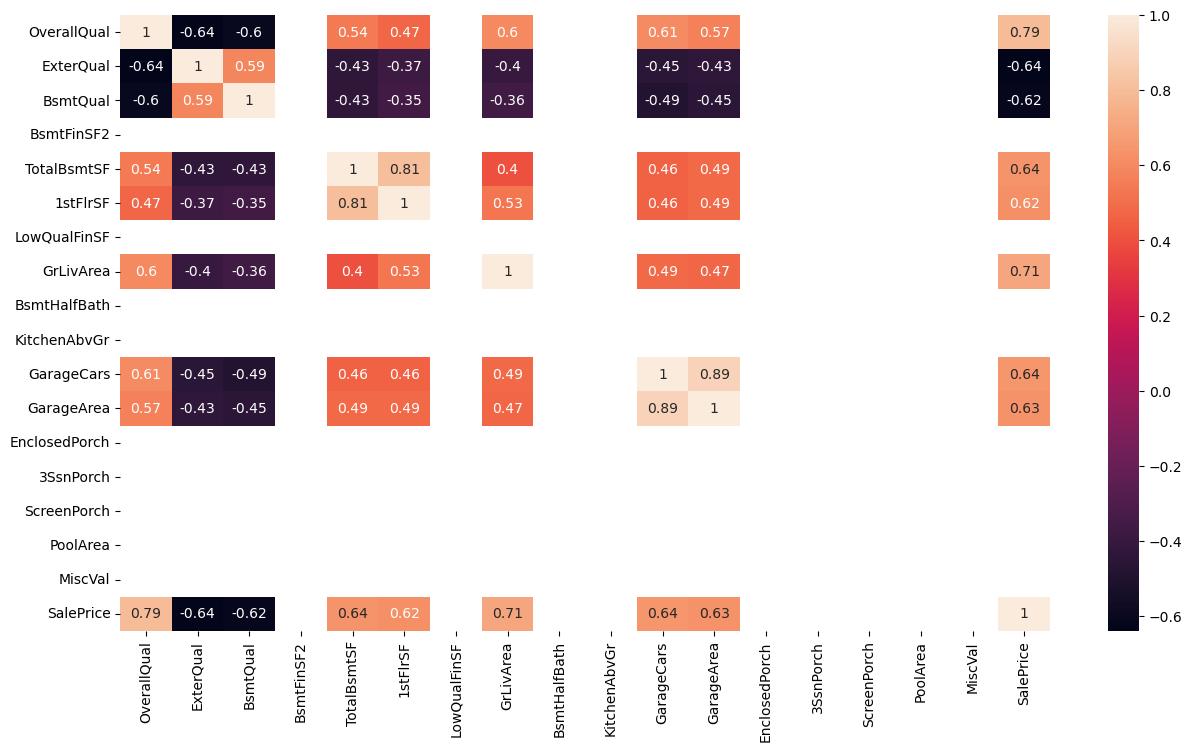

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

In [29]:
for col in data.columns:
    print(data[col].value_counts())

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       5
Name: count, dtype: int64
ExterQual
3    906
2    488
0     52
1     14
Name: count, dtype: int64
BsmtQual
3    686
2    618
0    121
1     35
Name: count, dtype: int64
BsmtFinSF2
0    1460
Name: count, dtype: int64
TotalBsmtSF
42      37
864     35
2052    24
672     17
912     15
        ..
1490     1
981      1
1766     1
1952     1
1542     1
Name: count, Length: 699, dtype: int64
1stFlrSF
864.000     25
2155.125    20
1040.000    16
912.000     14
894.000     12
            ..
1838.000     1
1159.000     1
334.000      1
751.000      1
1256.000     1
Name: count, Length: 734, dtype: int64
LowQualFinSF
0    1460
Name: count, dtype: int64
GrLivArea
2747.625    31
864.000     22
1040.000    14
894.000     11
1456.000    10
            ..
2296.000     1
1199.000     1
1586.000     1
1473.000     1
1256.000     1
Name: count, Length: 832, dtype: int64
BsmtHalfBath
0    1460
Name: count

## Data Splitting

In [30]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [31]:
def scaling_data(data):
    for col in data.columns:
        scale=MinMaxScaler()
        data[col]=scale.fit_transform(data[col].values.reshape(-1,1))
    return data    

In [32]:
X=scaling_data(X)

In [33]:
# pca=PCA(n_components=5)
# X_component=pca.fit_transform(X)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

## Data Modeling and Evaluation

Linear Regression Model

In [35]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [36]:
predict_train=LR.predict(x_train)
predict_test=LR.predict(x_test)

In [37]:
acc_train=r2_score(y_train,predict_train)
acc_test=r2_score(y_test,predict_test)

In [38]:
print("Accuracy of train : ",round(acc_train*100,2),'%')
print("Accuracy of test  : ",round(acc_test*100,2),'%')

Accuracy of train :  79.6 %
Accuracy of test  :  80.73 %


In [39]:
print("Mean Squared Error             : ",mean_squared_error(y_test,predict_test))
print("Mean Absolute Error            : ",mean_absolute_error(y_test,predict_test))
print("Mean Absolute Percentage Error : ",mean_absolute_percentage_error(y_test,predict_test))

Mean Squared Error             :  1477824489.7160366
Mean Absolute Error            :  24010.182916497757
Mean Absolute Percentage Error :  0.14990266024765395


Applying Cross Validation on Linear Regression Model

In [40]:
K=KFold(n_splits=5)
scores=cross_val_score(estimator=LR,X=X,y=Y,cv=K)
print(scores)
print(scores.mean())

[0.82778898 0.82196339 0.79108705 0.7999231  0.73604619]
0.7953617416709816


In [41]:
pca=PCA(n_components=1)
X_component_train=pca.fit_transform(x_train)
X_component_test=pca.fit_transform(x_test)

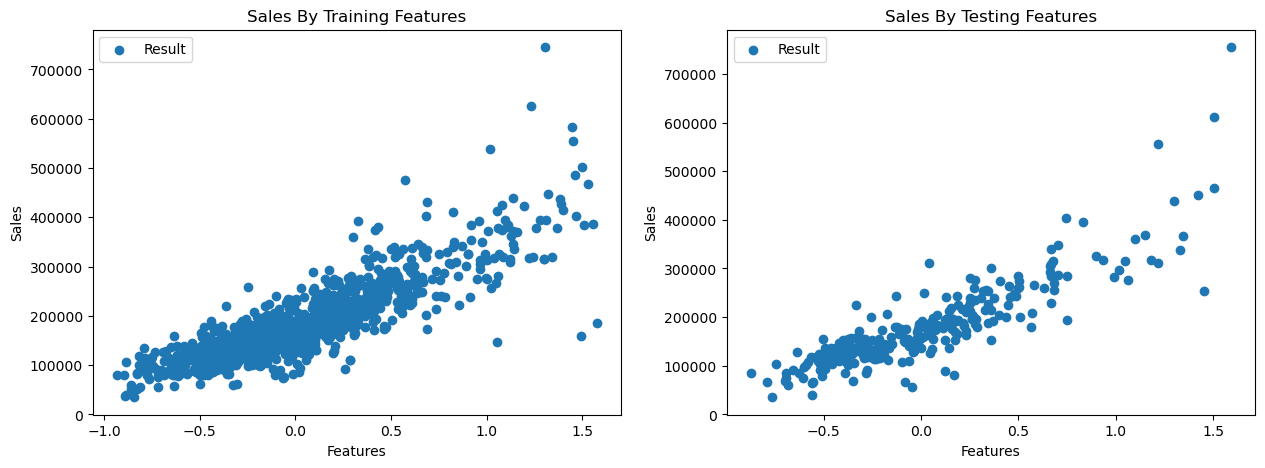

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Sales By Training Features")
plt.scatter(X_component_train,y_train)
plt.xlabel('Features')
plt.ylabel("Sales")
plt.legend(['Result'])
plt.subplot(1,2,2)
plt.title("Sales By Testing Features")
plt.scatter(X_component_test,y_test)
plt.xlabel('Features')
plt.ylabel("Sales")
plt.legend(['Result'])
plt.show()


Polynomial Regression Model

In [43]:
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
poly_LR=LinearRegression()
poly_LR.fit(x_train_poly,y_train)

LinearRegression()

In [44]:
predict_train2=poly_LR.predict(x_train_poly)
predict_test2=poly_LR.predict(x_test_poly)

In [45]:
acc_train2=r2_score(y_train,predict_train2)
acc_test2=r2_score(y_test,predict_test2)

In [46]:
print("Accuracy of train : ",round(acc_train2*100,2),'%')
print("Accuracy of test  : ",round(acc_test2*100,2),'%')

Accuracy of train :  84.78 %
Accuracy of test  :  84.56 %


In [47]:
print("Mean Squared Error             : ",mean_squared_error(y_test,predict_test2))
print("Mean Absolute Error            : ",mean_absolute_error(y_test,predict_test2))
print("Mean Absolute Percentage Error : ",mean_absolute_percentage_error(y_test,predict_test2))

Mean Squared Error             :  1184430216.860741
Mean Absolute Error            :  22215.05496939076
Mean Absolute Percentage Error :  0.1454410831054448


Decision Tree Regressor Model

In [48]:
DT=DecisionTreeRegressor(criterion='squared_error',max_depth=5,random_state=42)
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [49]:
predict_train3=DT.predict(x_train)
predict_test3=DT.predict(x_test)

In [50]:
acc_train3=r2_score(y_train,predict_train3)
acc_test3=r2_score(y_test,predict_test3)

In [51]:
print("Accuracy of train : ",round(acc_train3*100,2),'%')
print("Accuracy of test  : ",round(acc_test3*100,2),'%')

Accuracy of train :  84.69 %
Accuracy of test  :  77.75 %


In [52]:
print("Mean Squared Error             : ",mean_squared_error(y_test,predict_test3))
print("Mean Absolute Error            : ",mean_absolute_error(y_test,predict_test3))
print("Mean Absolute Percentage Error : ",mean_absolute_percentage_error(y_test,predict_test3))

Mean Squared Error             :  1706945310.0678098
Mean Absolute Error            :  25954.71545223384
Mean Absolute Percentage Error :  0.15959862698926439


Random Forest Regressor Model

In [53]:
RF=RandomForestRegressor(n_estimators=50,criterion='squared_error',max_depth=7,random_state=42)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=50, random_state=42)

In [54]:
predict_train4=RF.predict(x_train)
predict_test4=RF.predict(x_test)

In [55]:
acc_train4=r2_score(y_train,predict_train4)
acc_test4=r2_score(y_test,predict_test4)

In [56]:
print("Accuracy of train : ",round(acc_train4*100,2),'%')
print("Accuracy of test  : ",round(acc_test4*100,2),'%')

Accuracy of train :  92.97 %
Accuracy of test  :  85.66 %


In [57]:
print("Mean Squared Error             : ",mean_squared_error(y_test,predict_test4))
print("Mean Absolute Error            : ",mean_absolute_error(y_test,predict_test4))
print("Mean Absolute Percentage Error : ",mean_absolute_percentage_error(y_test,predict_test4))

Mean Squared Error             :  1099688380.0020232
Mean Absolute Error            :  20232.933676961566
Mean Absolute Percentage Error :  0.12905662647965727


Boosting Model

In [58]:
boost=AdaBoostRegressor(estimator=poly_LR,n_estimators=50,learning_rate=0.01,random_state=42)
boost.fit(x_train_poly,y_train)

AdaBoostRegressor(estimator=LinearRegression(), learning_rate=0.01,
                  random_state=42)

In [59]:
predict_train5=boost.predict(x_train_poly)
predict_test5=boost.predict(x_test_poly)

In [60]:
acc_train5=r2_score(y_train,predict_train5)
acc_test5=r2_score(y_test,predict_test5)

In [61]:
print("Accuracy of train : ",round(acc_train5*100,2),'%')
print("Accuracy of test  : ",round(acc_test5*100,2),'%')

Accuracy of train :  84.94 %
Accuracy of test  :  83.78 %


In [62]:
print("Mean Squared Error             : ",mean_squared_error(y_test,predict_test5))
print("Mean Absolute Error            : ",mean_absolute_error(y_test,predict_test5))
print("Mean Absolute Percentage Error : ",mean_absolute_percentage_error(y_test,predict_test5))

Mean Squared Error             :  1244035850.0788364
Mean Absolute Error            :  22419.358264718136
Mean Absolute Percentage Error :  0.14755364234603488


Bagging Model

In [63]:
bagging=BaggingRegressor(estimator=poly_LR,n_estimators=50,random_state=42)
bagging.fit(x_train_poly,y_train)

BaggingRegressor(estimator=LinearRegression(), n_estimators=50, random_state=42)

In [64]:
predict_train6=bagging.predict(x_train_poly)
predict_test6=bagging.predict(x_test_poly)

In [65]:
acc_train6=r2_score(y_train,predict_train6)
acc_test6=r2_score(y_test,predict_test6)

In [66]:
print("Accuracy of train : ",round(acc_train6*100,2),'%')
print("Accuracy of test  : ",round(acc_test6*100,2),'%')

Accuracy of train :  84.72 %
Accuracy of test  :  85.06 %


In [67]:
print("Mean Squared Error             : ",mean_squared_error(y_test,predict_test6))
print("Mean Absolute Error            : ",mean_absolute_error(y_test,predict_test6))
print("Mean Absolute Percentage Error : ",mean_absolute_percentage_error(y_test,predict_test6))

Mean Squared Error             :  1146206459.6153405
Mean Absolute Error            :  21938.996666847277
Mean Absolute Percentage Error :  0.14442090746912714


## Save Models

In [70]:
pickle.dump(LR,open(r'models\LR_model.pkl','wb'))
pickle.dump(poly_LR,open(r'models\Poly_LR_model.pkl','wb'))
pickle.dump(DT,open(r'models\DTR_model.pkl','wb'))
pickle.dump(RF,open(r'models\RFR_model.pkl','wb'))
pickle.dump(boost,open(r'models\Boost_model.pkl','wb'))
pickle.dump(bagging,open(r'models\Bagging_model.pkl','wb'))

## Load Models

In [71]:
def load_models():
    file = open(r'models\LR_model.pkl', 'rb')
    LR= pickle.load(file)   
    file = open(r'models\Poly_LR_model.pkl', 'rb')
    Poly_LR= pickle.load(file) 
    file = open(r'models\DTR_model.pkl', 'rb')
    DT= pickle.load(file) 
    file = open(r'models\RFR_model.pkl', 'rb')
    RF= pickle.load(file)
    file = open(r'models\Boost_model.pkl','rb')
    boost= pickle.load(file)
    file = open(r'models\Bagging_model.pkl','rb')
    bagging= pickle.load(file)

    return LR,Poly_LR,DT,RF,boost,bagging  

In [72]:
def load_models():
    file = open(r'models\LR_model.pkl', 'rb')
    LR= pickle.load(file)   
    file = open(r'models\Poly_LR_model.pkl', 'rb')
    Poly_LR= pickle.load(file) 
    file = open(r'models\DTR_model.pkl', 'rb')
    DT= pickle.load(file) 
    file = open(r'models\RFR_model.pkl', 'rb')
    RF= pickle.load(file)
    file = open(r'models\Boost_model.pkl','rb')
    boost= pickle.load(file)
    file = open(r'models\Bagging_model.pkl','rb')
    bagging= pickle.load(file)

    return LR,Poly_LR,DT,RF,boost,bagging  